In [7]:
%matplotlib inline
# Sistema Massa-mola

In [8]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

## Ajuste Linear Sinosoidal Amortecida

In [44]:
Npontos=100
t = np.arange(0,Npontos)
om = np.pi /10
lbd = 1.0/20

### Dados simulados

In [49]:
t.shape[0]
rng = np.random.default_rng()
y = np.exp(-t*lbd)* np.sin(om * t) + 0.01*rng.random(Npontos)

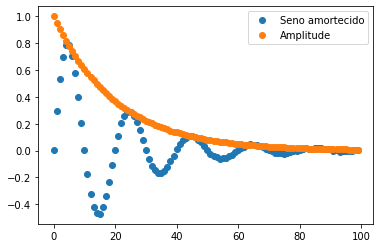

In [50]:
plt.plot(t, y, 'o', label='Seno amortecido')
plt.plot(t, np.exp(-t*lbd), 'o', label='Amplitude')
plt.legend()
plt.show()

### Funcao de Ajuste

In [60]:
def Fsina(x,a,b,c):
    return a*np.exp(-b*x)*np.sin(c*t)
def Famp(x,a,b,c):
    return a*np.exp(-b*x)

In [73]:
from scipy.optimize import curve_fit
guess = [0.4, 1.0/6, 6/4]
popt, pcov = curve_fit(Fsina, t, y, p0=guess)
#The optimised parameters of the fit
print("popt: a=%g, b=%g, c=%g" %(popt[0], popt[1], popt[2]))
#One standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
print("perr:", perr)
#The covariance matrix of the parameters
print("pcov:", pcov)
print("1/Lambda: %g s" %(1.0/popt[1]))
print("Omega: %g s-1" %(1.0/popt[2]))

popt: a=1.00873, b=0.0505395, c=0.314165
perr: [0.00389276 0.0002724  0.00018558]
pcov: [[ 1.51536003e-05  7.77627397e-07 -9.00789553e-09]
 [ 7.77627397e-07  7.42009586e-08 -5.95684116e-10]
 [-9.00789553e-09 -5.95684116e-10  3.44387436e-08]]
1/Lambda: 19.7865 s
Omega: 3.18304 s-1


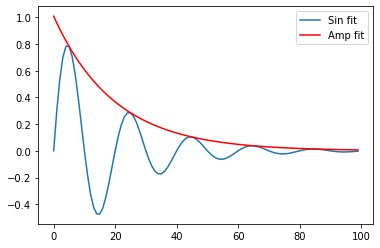

In [70]:
plt.plot(t, Fsina(t, *popt), label='Sin fit')
plt.plot(t, Famp(t, *popt), 'r', label='Amp fit')
plt.legend()
plt.show()

In [71]:
np.sqrt(np.diag(pcov))

array([0.00389276, 0.0002724 , 0.00018558])